## Importing libraries, reading and viewing files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [5]:
test.head()

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38272 entries, 0 to 38271
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      38272 non-null  float64
 1   V       38272 non-null  float64
 2   AP      38272 non-null  float64
 3   RH      38272 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


No null value in train as well as test dataset.

## Visualization

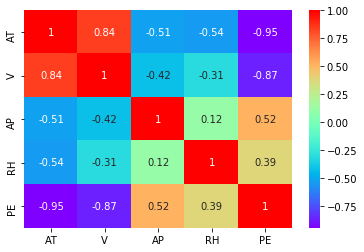

In [12]:
sns.heatmap(train.corr(),cmap='rainbow',annot=True)

Exhaust vaccum and temperatures are <b>highly correlated</b> and there is<b> highly negative correlation</b> between temperature and electrical energy output.

Text(0.5, 0, 'PE')

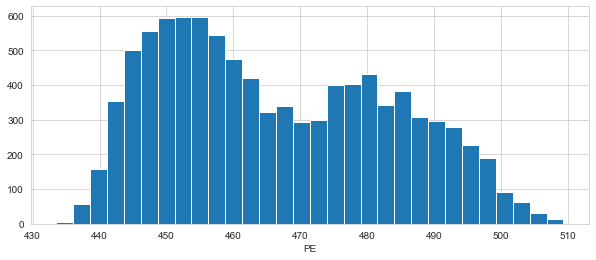

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
plt.hist(train['PE'],bins=30)
plt.xlabel('PE')


Text(0, 0.5, 'PE')

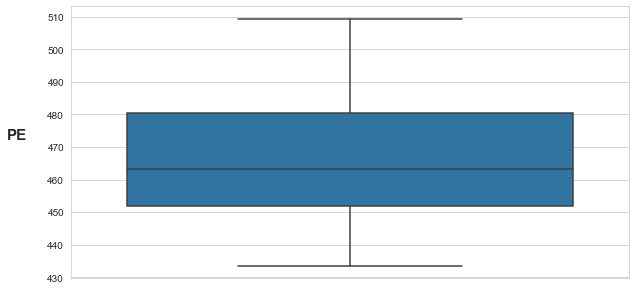

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(train['PE'],orient='v')
plt.ylabel('PE',rotation=0,fontweight='bold',labelpad=30,size=15)

There are no outliers.

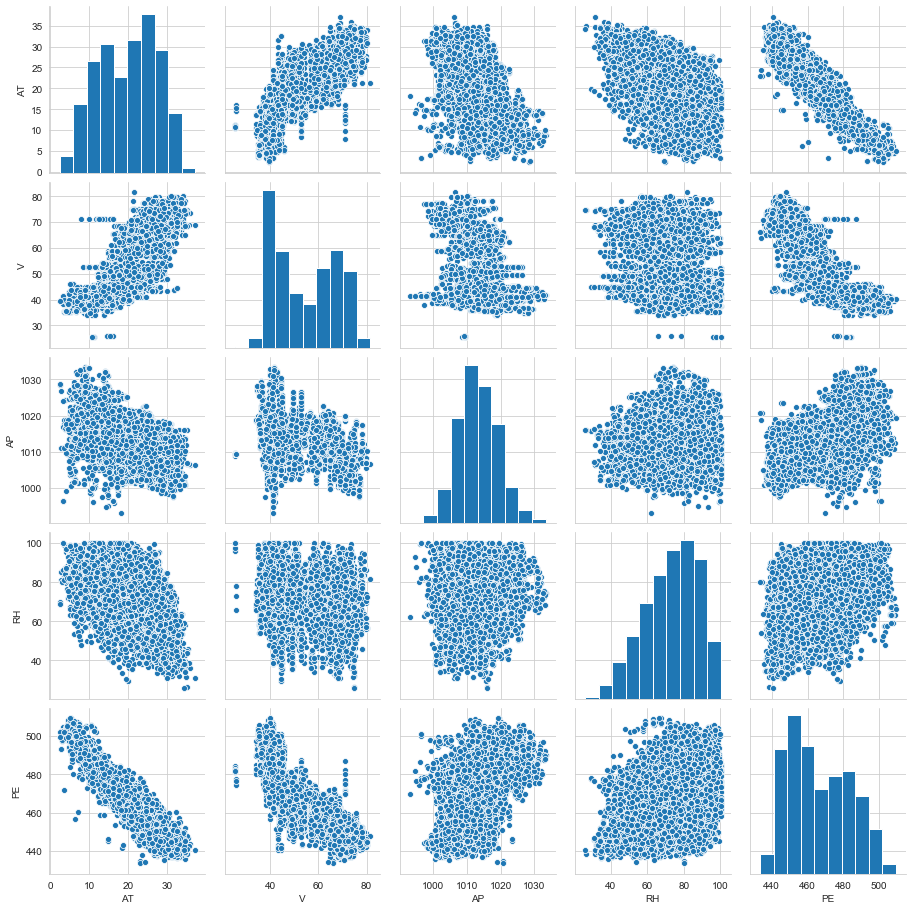

In [45]:
sns.pairplot(train)

## Applying ML models

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=train.drop('PE',axis=1)

In [48]:
y=train['PE']

In [49]:
X

,AT,V,AP,RH
0,29.07,72.51,1009.24,58.38
1,32.38,67.17,1006.97,60.04
2,19.29,67.71,1007.94,63.71
3,16.45,41.48,1016.64,45.21
4,21.43,46.97,1013.94,61.25
...,...,...,...,...
9563,4.44,38.44,1016.14,75.35
9564,18.18,67.71,1004.50,87.26
9565,10.96,45.01,1017.97,95.82
9566,8.70,36.24,1013.34,89.50


In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7654, 4), (1914, 4), (7654,), (1914,))

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr= LinearRegression().fit(X_train,y_train)

In [55]:
y_pred=lr.predict(X_test)

In [57]:
from sklearn import metrics

In [60]:
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [61]:
print('rmse for Linear Regression is:',rmse_lr)

rmse for Linear Regression is: 4.709826121798636


### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [79]:
rfr=RandomForestRegressor()

In [103]:
param={'n_estimators':[50,100,150,200],'max_depth':[12],'min_samples_split':[2]}

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_rfr= GridSearchCV(rfr,param,verbose=3)

In [106]:
grid_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=12, min_samples_split=2, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=12, min_samples_split=2, n_estimators=50, score=0.966, total=   1.2s
[CV] max_depth=12, min_samples_split=2, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=12, min_samples_split=2, n_estimators=50, score=0.961, total=   1.1s
[CV] max_depth=12, min_samples_split=2, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=12, min_samples_split=2, n_estimators=50, score=0.963, total=   1.2s
[CV] max_depth=12, min_samples_split=2, n_estimators=50 ..............
[CV]  max_depth=12, min_samples_split=2, n_estimators=50, score=0.962, total=   1.3s
[CV] max_depth=12, min_samples_split=2, n_estimators=50 ..............
[CV]  max_depth=12, min_samples_split=2, n_estimators=50, score=0.969, total=   1.3s
[CV] max_depth=12, min_samples_split=2, n_estimators=100 .............
[CV]  max_depth=12, min_samples_split=2, n_estimators=100, score=0.965, total=   2.4s
[CV] max_depth=12, min_samples_split=2, n_estimators=100 .............
[CV]  max_depth=12, min_samples_split=2, n_estimators=100, score=0.960, total=   2.3s
[CV] max_depth=12, min_samples_split=2, n_estimators=100 .............
[CV]  max_depth=12, min_samples_split=2, n_estimators=100, score=0.964, total=   2.4s
[CV] max_depth=12, min_samples_split=2, n_estimators=100 .............
[CV]  max_depth=12, min_samples_split=2, n_estimators=100, sc

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   58.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [107]:
rfr=grid_rfr.best_estimator_

In [108]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
pred_rfr= rfr.predict(X_test)

In [110]:
rmse_rfr=np.sqrt(metrics.mean_squared_error(y_test,pred_rfr))

In [111]:
print('rmse for Random Forest is:',rmse_rfr)

rmse for Random Forest is: 3.055691216527067


### Gradient Boost

In [113]:
gb= GradientBoostingRegressor()

In [114]:
param_gb={'n_estimators':[50,100,150,200],'learning_rate':[0.05,0.1,0.15],'min_samples_split':range(2,8),'max_depth':[2,4,6,8]}

In [118]:
grid_gb=GridSearchCV(gb,param_gb,verbose=2)

In [119]:
grid_gb.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=100, total=   0.7s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimators=100, total=   0.7s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=2, n_estimator

[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150, total=   1.1s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150, total=   1.0s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150, total=   1.0s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150, total=   1.1s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=150, total=   1.0s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=4, n_estimators=200, total=   1.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=4, n_es

[CV]  learning_rate=0.05, max_depth=2, min_samples_split=6, n_estimators=200, total=   1.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50, total=   0.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50, total=   0.4s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, max_depth=2, min_samples_split=7, n_estimators=1

[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150, total=   2.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150, total=   2.0s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150, total=   2.0s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=150, total=   2.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=3, n_es

[CV]  learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=200, total=   2.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=200, total=   2.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=200, total=   2.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50, total=   0.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimators=50, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_split=6, n_estimato

[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=150, total=   2.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=150, total=   2.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=2, n_es

[CV]  learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200, total=   3.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200, total=   3.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200, total=   3.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200, total=   3.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=4, n_estimators=200, total=   3.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=50, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=5, n_esti

[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=50, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100, total=   1.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100, total=   1.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=7, n_estimators=100, total=   1.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=7, n_est

[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=150, total=   3.6s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=150, total=   4.3s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   4.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   4.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   4.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=200, total=   4.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=3, n_es

[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100, total=   2.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100, total=   2.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimators=100, total=   2.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_split=6, n_estimat

[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150, total=   1.1s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150, total=   1.2s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=150, total=   1.3s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200

[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=100, total=   0.7s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=5, n_estimators=100 
[CV] 

[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=150, total=   1.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=2, min_samples_split=7, n_estimators=200

[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=100, total=   1.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=100, total=   1.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=100 
[CV] 

[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150, total=   2.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150, total=   1.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150, total=   1.9s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150, total=   2.0s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=200, total=   2.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=200, total=   2.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=200

[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=100, total=   1.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=100, total=   1.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=3, n_estimators=100 
[CV] 

[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=150, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=200, total=   3.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=200, total=   3.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=200

[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100 
[CV] 

[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150, total=   3.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150, total=   3.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150, total=   3.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=150, total=   3.6s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=200, total=   4.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=200, total=   4.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=4, n_estimators=200

[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_split=7, n_estimators=100 
[CV] 

[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=3, n_es

[CV]  learning_rate=0.15, max_depth=2, min_samples_split=5, n_estimators=200, total=   1.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] learning_rate=0.15, max_depth=2, min_samples_split=6, n_estimators=1

[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150, total=   1.9s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150, total=   2.0s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150, total=   2.0s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=150, total=   2.0s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=2, n_es

[CV]  learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200, total=   2.6s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200, total=   2.6s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200, total=   2.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimators=50, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=5, n_estimato

[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=100, total=   1.3s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=150, total=   1.9s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=4, min_samples_split=7, n_estimators=150, total=   1.9s
[CV] learning_rate=0.15, max_depth=4, min_samples_split=7, n_es

[CV]  learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200, total=   3.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200, total=   3.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200, total=   3.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200, total=   3.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=3, n_estimators=200, total=   3.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=4, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=4, n_estimators=50, total=   0.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=4, n_esti

[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=50, total=   0.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100, total=   1.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100, total=   1.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100, total=   1.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100, total=   1.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_split=6, n_estimators=100, total=   1.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_split=6, n_est

[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=150, total=   3.8s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=150, total=   3.7s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200, total=   5.1s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200, total=   5.0s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200, total=   5.0s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=2, n_estimators=200, total=   5.1s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=2, n_es

[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100, total=   2.5s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100, total=   2.4s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimators=100, total=   2.5s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=5, n_estimat

[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150, total=   3.8s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150, total=   3.7s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150, total=   3.7s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=150, total=   3.7s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=200, total=   4.9s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.15, max_depth=8, min_samples_split=7, n_estimators=200, total=   5.0s
[CV] learning_rate=0.15, max_depth=8, min_samples_split=7, n_es

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 47.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

In [121]:
gb=grid_gb.best_estimator_

In [122]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
pred_gb=gb.predict(X_test)

In [124]:
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test,pred_gb))
print('rmse for Gradient Boost is:',rmse_gb)

rmse for Gradient Boost is: 2.6522157690096666


## Evaluating Model Performances

In [125]:
model_performance=pd.DataFrame({'Model':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor'],
                                'RMSE':[rmse_lr,rmse_rfr,rmse_gb]
    
})

In [127]:
model_performance

,Model,RMSE
0,LinearRegression,4.709826
1,RandomForestRegressor,3.055691
2,GradientBoostingRegressor,2.652216


Gradient Boost has the least rmse. So, Gradient Boost is preferred.

## Submission

In [128]:
gb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
submission_pred= gb.predict(test)

In [131]:
submission_pred

array([472.69572127, 493.31713974, 495.79151265, ..., 471.95174806,
       445.71394081, 464.20225946])

In [132]:
submission= pd.DataFrame({'PE':submission_pred})

In [133]:
submission

,PE
0,472.695721
1,493.317140
2,495.791513
3,480.401040
4,446.405488
...,...
38267,474.974025
38268,446.896418
38269,471.951748
38270,445.713941


In [134]:
submission.to_csv('PE',index=False)

In [135]:
submission.shape

(38272, 1)